## Practical Work 3
## Mohamed Ali Farag

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods <b>(Momentum and NAG)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [2]:
a, b = -1, 2
x_input = np.linspace(0,20)
y_output = a*x_input + b 

#### Plot your data points. 

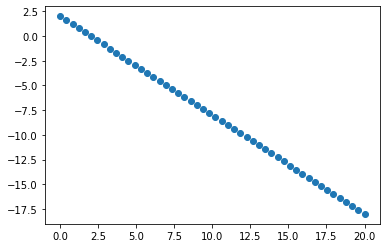

In [3]:
plt.scatter(x_input, y_output)
plt.show()

#### Use your final version of the implemented Batch GD algorithm for single variable to find the best line filt of the given data.
#### Coose the suitable number of iterations, learning rate, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph) , best fit line)

In [4]:
def gradient_descent(x_input_fun, y_output_fun, learing_rate, max_iter):
    m = len(x_input_fun)
    theta_0, theta_1, cost = 2.5, 0, 0
    all_theta_0, all_theta_1, costs = [], [], []
    
    for i in range(max_iter):
        hypothesis = theta_0 + theta_1 * x_input_fun
        cost = (1/(2 * m)) * ((np.linalg.norm(hypothesis - y_output_fun)) ** 2)
        gradients = [(1/m) * np.sum(hypothesis - y_output_fun), (1/m) * np.sum(x_input_fun.dot(hypothesis - y_output_fun))]
        theta_0 = theta_0 - alpha * gradients[0]
        theta_1 = theta_1 - alpha * gradients[1]
        
        all_theta_0.append(theta_0)
        all_theta_1.append(theta_1)
        costs.append(cost)

    return all_theta_0, all_theta_1, costs

In [5]:
iteration = 50
alpha = 0.001
thetas_0, thetas_1, costs = gradient_descent(x_input, y_output, alpha, iteration)

In [6]:
y_predicated = thetas_0[-1] + thetas_1[-1] * x_input
y_predicated

array([  2.41793978,   1.99738029,   1.57682081,   1.15626133,
         0.73570185,   0.31514237,  -0.10541711,  -0.5259766 ,
        -0.94653608,  -1.36709556,  -1.78765504,  -2.20821452,
        -2.62877401,  -3.04933349,  -3.46989297,  -3.89045245,
        -4.31101193,  -4.73157142,  -5.1521309 ,  -5.57269038,
        -5.99324986,  -6.41380934,  -6.83436883,  -7.25492831,
        -7.67548779,  -8.09604727,  -8.51660675,  -8.93716624,
        -9.35772572,  -9.7782852 , -10.19884468, -10.61940416,
       -11.03996364, -11.46052313, -11.88108261, -12.30164209,
       -12.72220157, -13.14276105, -13.56332054, -13.98388002,
       -14.4044395 , -14.82499898, -15.24555846, -15.66611795,
       -16.08667743, -16.50723691, -16.92779639, -17.34835587,
       -17.76891536, -18.18947484])

In [7]:
r2_score(y_output, y_predicated)

0.9987014988353078

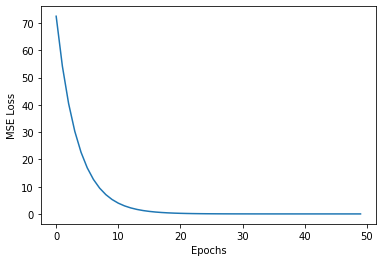

In [8]:
plt.plot(costs)
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.show()

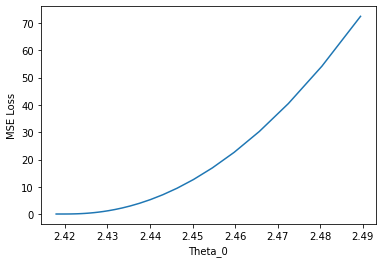

In [9]:
plt.plot(thetas_0 ,costs)
plt.xlabel("Theta_0")
plt.ylabel("MSE Loss")
plt.show()

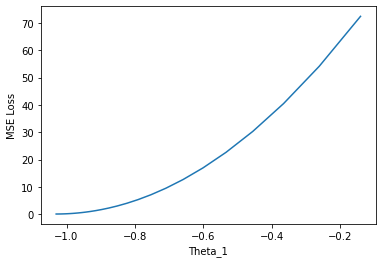

In [10]:
plt.plot(thetas_1,costs)
plt.xlabel("Theta_1")
plt.ylabel("MSE Loss")
plt.show()

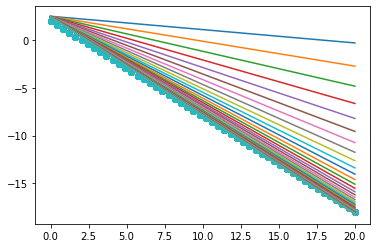

In [11]:
for i in range(iteration):
    y_predicated_draw = thetas_0[i] + thetas_1[i] * x_input
    plt.scatter(x_input, y_output)
    plt.plot(x_input, y_predicated_draw)

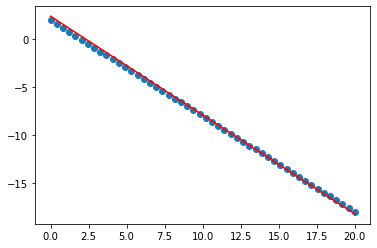

In [12]:
y_predicated_best = thetas_0[-1] + thetas_1[-1] * x_input
plt.scatter(x_input, y_output)
plt.plot(x_input, y_predicated_draw, 'r')

### Update your Batch GD for one variable  implementation to be Momentum-Based GD and check your results

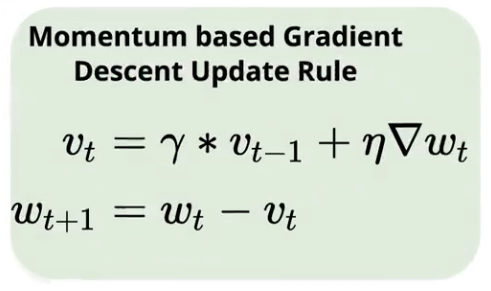

#### γ takes values between 0 and 1.
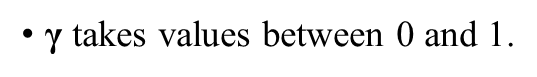

In [13]:
def momentum_gradient_descent(x_input_fun, y_output_fun, learing_rate, gamma_fun, max_iter):
    m = len(x_input_fun)
    theta_0, theta_1, cost = 2.5, 0, 0
    v_old_0, v_new_0, v_old_1, v_new_1 = 0, 0, 0, 0
    all_theta_0, all_theta_1, costs = [], [], []
    
    for i in range(max_iter):
        hypothesis = theta_0 + theta_1 * x_input_fun
        cost = (1/(2 * m)) * ((np.linalg.norm(hypothesis - y_output_fun)) ** 2)
        gradients = [(1/m) * np.sum(hypothesis - y_output_fun), (1/m) * np.sum(x_input_fun.dot(hypothesis - y_output_fun))]
        
        #Momentum update
        v_new_0 = gamma_fun*v_old_0 + learing_rate*gradients[0]
        v_new_1 = gamma_fun*v_old_1 + learing_rate*gradients[1]
        theta_0 = theta_0 - v_new_0
        theta_1 = theta_1 - v_new_1
        v_old_0 = v_new_1
        v_old_1 = v_new_1
   
        all_theta_0.append(theta_0)
        all_theta_1.append(theta_1)
        costs.append(cost)

    return all_theta_0, all_theta_1, costs

In [14]:
iteration = 50
alpha = 0.001
gamma = 0.5
thetas_0, thetas_1, costs = momentum_gradient_descent(x_input, y_output, alpha, gamma, iteration)

In [15]:
y_predicated = thetas_0[-1] + thetas_1[-1] * x_input
y_predicated

array([  1.96416647,   1.55709009,   1.1500137 ,   0.74293731,
         0.33586093,  -0.07121546,  -0.47829185,  -0.88536823,
        -1.29244462,  -1.69952101,  -2.10659739,  -2.51367378,
        -2.92075017,  -3.32782655,  -3.73490294,  -4.14197933,
        -4.54905571,  -4.9561321 ,  -5.36320849,  -5.77028487,
        -6.17736126,  -6.58443765,  -6.99151403,  -7.39859042,
        -7.80566681,  -8.21274319,  -8.61981958,  -9.02689597,
        -9.43397235,  -9.84104874, -10.24812513, -10.65520151,
       -11.0622779 , -11.46935429, -11.87643067, -12.28350706,
       -12.69058345, -13.09765983, -13.50473622, -13.91181261,
       -14.318889  , -14.72596538, -15.13304177, -15.54011816,
       -15.94719454, -16.35427093, -16.76134732, -17.1684237 ,
       -17.57550009, -17.98257648])

In [16]:
r2_score(y_output, y_predicated)

0.9999904669393676

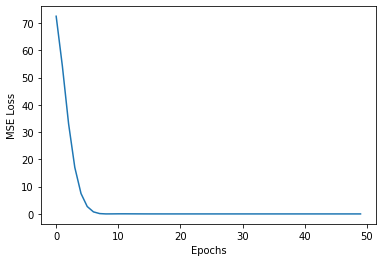

In [17]:
plt.plot(costs)
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.show()

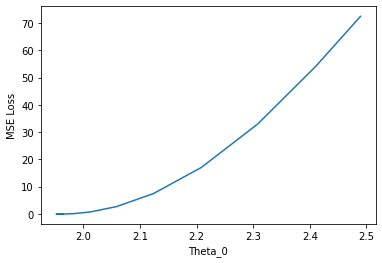

In [18]:
plt.plot(thetas_0 ,costs)
plt.xlabel("Theta_0")
plt.ylabel("MSE Loss")
plt.show()

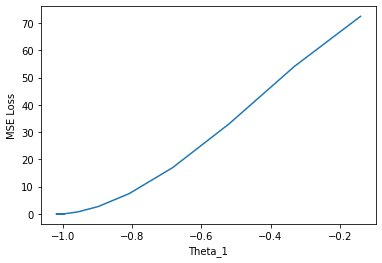

In [19]:
plt.plot(thetas_1,costs)
plt.xlabel("Theta_1")
plt.ylabel("MSE Loss")
plt.show()

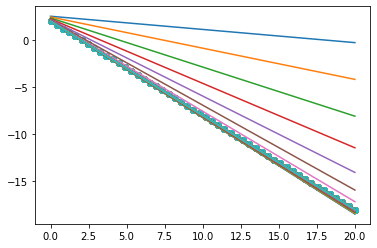

In [20]:
for i in range(iteration):
    y_predicated_draw = thetas_0[i] + thetas_1[i] * x_input
    plt.scatter(x_input, y_output)
    plt.plot(x_input, y_predicated_draw)

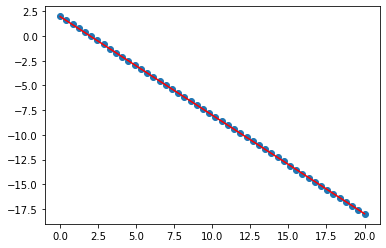

In [21]:
y_predicated_best = thetas_0[-1] + thetas_1[-1] * x_input
plt.scatter(x_input, y_output)
plt.plot(x_input, y_predicated_draw, 'r')

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

In [22]:
#Momentum = 0.99
#doesn't converge

In [23]:
iteration = 200
alpha = 0.001
gamma = 0.99
thetas_0, thetas_1, costs = momentum_gradient_descent(x_input, y_output, alpha, gamma, iteration)

In [24]:
y_predicated = thetas_0[-1] + thetas_1[-1] * x_input
y_predicated

array([  2.06496804,   1.75873203,   1.45249602,   1.14626001,
         0.840024  ,   0.53378799,   0.22755198,  -0.07868403,
        -0.38492004,  -0.69115605,  -0.99739207,  -1.30362808,
        -1.60986409,  -1.9161001 ,  -2.22233611,  -2.52857212,
        -2.83480813,  -3.14104414,  -3.44728015,  -3.75351616,
        -4.05975217,  -4.36598819,  -4.6722242 ,  -4.97846021,
        -5.28469622,  -5.59093223,  -5.89716824,  -6.20340425,
        -6.50964026,  -6.81587627,  -7.12211228,  -7.42834829,
        -7.73458431,  -8.04082032,  -8.34705633,  -8.65329234,
        -8.95952835,  -9.26576436,  -9.57200037,  -9.87823638,
       -10.18447239, -10.4907084 , -10.79694441, -11.10318042,
       -11.40941644, -11.71565245, -12.02188846, -12.32812447,
       -12.63436048, -12.94059649])

In [25]:
r2_score(y_output, y_predicated)

0.7484184466788442

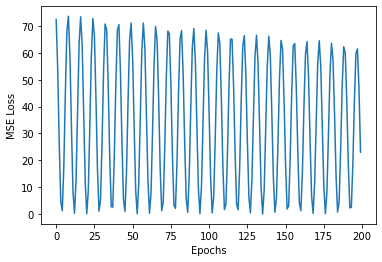

In [26]:
plt.plot(costs)
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.show()

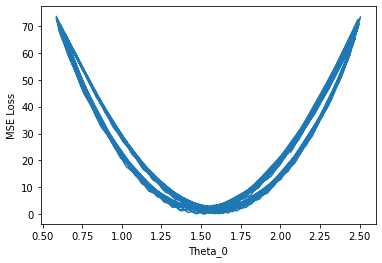

In [27]:
plt.plot(thetas_0 ,costs)
plt.xlabel("Theta_0")
plt.ylabel("MSE Loss")
plt.show()

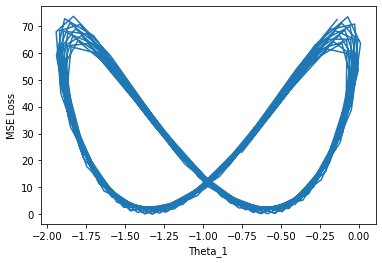

In [28]:
plt.plot(thetas_1,costs)
plt.xlabel("Theta_1")
plt.ylabel("MSE Loss")
plt.show()

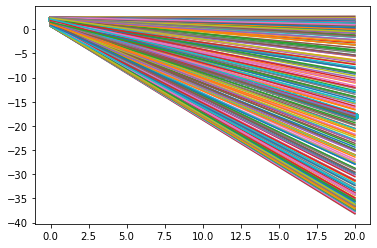

In [29]:
for i in range(iteration):
    y_predicated_draw = thetas_0[i] + thetas_1[i] * x_input
    plt.scatter(x_input, y_output)
    plt.plot(x_input, y_predicated_draw)

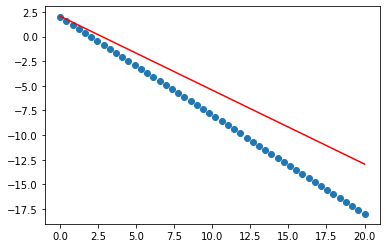

In [30]:
y_predicated_best = thetas_0[-1] + thetas_1[-1] * x_input
plt.scatter(x_input, y_output)
plt.plot(x_input, y_predicated_draw, 'r')

In [31]:
#Momentum = 0.95
#converge after approx. 125 iteration

In [32]:
iteration = 200
alpha = 0.001
gamma = 0.95
thetas_0, thetas_1, costs = momentum_gradient_descent(x_input, y_output, alpha, gamma, iteration)

In [33]:
y_predicated = thetas_0[-1] + thetas_1[-1] * x_input
y_predicated

array([ 1.59685760e+00,  1.19923720e+00,  8.01616804e-01,  4.03996408e-01,
        6.37601172e-03, -3.91244384e-01, -7.88864780e-01, -1.18648518e+00,
       -1.58410557e+00, -1.98172597e+00, -2.37934636e+00, -2.77696676e+00,
       -3.17458716e+00, -3.57220755e+00, -3.96982795e+00, -4.36744834e+00,
       -4.76506874e+00, -5.16268914e+00, -5.56030953e+00, -5.95792993e+00,
       -6.35555032e+00, -6.75317072e+00, -7.15079112e+00, -7.54841151e+00,
       -7.94603191e+00, -8.34365231e+00, -8.74127270e+00, -9.13889310e+00,
       -9.53651349e+00, -9.93413389e+00, -1.03317543e+01, -1.07293747e+01,
       -1.11269951e+01, -1.15246155e+01, -1.19222359e+01, -1.23198563e+01,
       -1.27174767e+01, -1.31150971e+01, -1.35127175e+01, -1.39103378e+01,
       -1.43079582e+01, -1.47055786e+01, -1.51031990e+01, -1.55008194e+01,
       -1.58984398e+01, -1.62960602e+01, -1.66936806e+01, -1.70913010e+01,
       -1.74889214e+01, -1.78865418e+01])

In [34]:
r2_score(y_output, y_predicated)

0.998728113939907

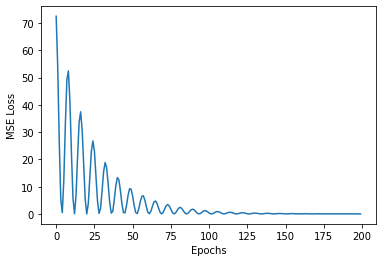

In [35]:
plt.plot(costs)
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.show()

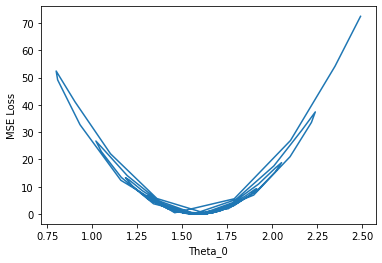

In [36]:
plt.plot(thetas_0 ,costs)
plt.xlabel("Theta_0")
plt.ylabel("MSE Loss")
plt.show()

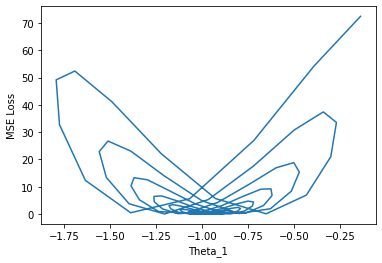

In [37]:
plt.plot(thetas_1,costs)
plt.xlabel("Theta_1")
plt.ylabel("MSE Loss")
plt.show()

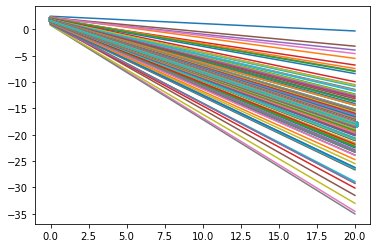

In [38]:
for i in range(iteration):
    y_predicated_draw = thetas_0[i] + thetas_1[i] * x_input
    plt.scatter(x_input, y_output)
    plt.plot(x_input, y_predicated_draw)

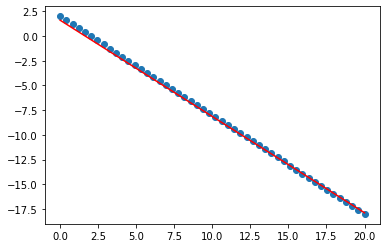

In [39]:
y_predicated_best = thetas_0[-1] + thetas_1[-1] * x_input
plt.scatter(x_input, y_output)
plt.plot(x_input, y_predicated_draw, 'r')

In [40]:
#Momentum = 0.1
#act like normal GD

In [41]:
iteration = 200
alpha = 0.001
gamma = 0.1
thetas_0, thetas_1, costs = momentum_gradient_descent(x_input, y_output, alpha, gamma, iteration)

In [42]:
y_predicated = thetas_0[-1] + thetas_1[-1] * x_input
y_predicated

array([  2.31247365,   1.89482537,   1.47717708,   1.05952879,
         0.6418805 ,   0.22423222,  -0.19341607,  -0.61106436,
        -1.02871265,  -1.44636094,  -1.86400922,  -2.28165751,
        -2.6993058 ,  -3.11695409,  -3.53460238,  -3.95225066,
        -4.36989895,  -4.78754724,  -5.20519553,  -5.62284381,
        -6.0404921 ,  -6.45814039,  -6.87578868,  -7.29343697,
        -7.71108525,  -8.12873354,  -8.54638183,  -8.96403012,
        -9.3816784 ,  -9.79932669, -10.21697498, -10.63462327,
       -11.05227156, -11.46991984, -11.88756813, -12.30521642,
       -12.72286471, -13.140513  , -13.55816128, -13.97580957,
       -14.39345786, -14.81110615, -15.22875443, -15.64640272,
       -16.06405101, -16.4816993 , -16.89934759, -17.31699587,
       -17.73464416, -18.15229245])

In [43]:
r2_score(y_output, y_predicated)

0.9992750925085793

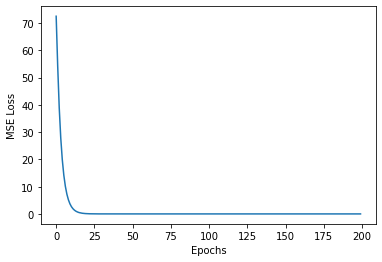

In [44]:
plt.plot(costs)
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.show()

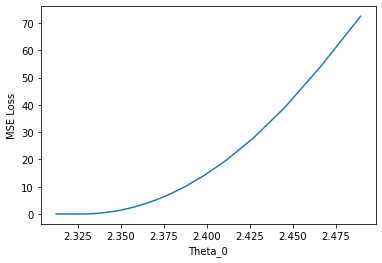

In [45]:
plt.plot(thetas_0 ,costs)
plt.xlabel("Theta_0")
plt.ylabel("MSE Loss")
plt.show()

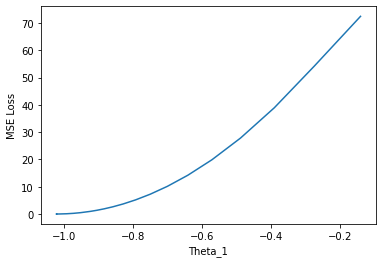

In [46]:
plt.plot(thetas_1,costs)
plt.xlabel("Theta_1")
plt.ylabel("MSE Loss")
plt.show()

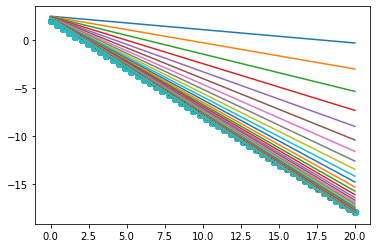

In [47]:
for i in range(iteration):
    y_predicated_draw = thetas_0[i] + thetas_1[i] * x_input
    plt.scatter(x_input, y_output)
    plt.plot(x_input, y_predicated_draw)

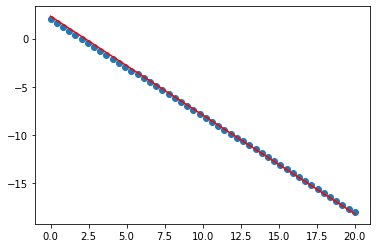

In [48]:
y_predicated_best = thetas_0[-1] + thetas_1[-1] * x_input
plt.scatter(x_input, y_output)
plt.plot(x_input, y_predicated_draw, 'r')

In [49]:
#Momentum = zero
#normal GD

In [50]:
iteration = 50
alpha = 0.001
gamma = 0
thetas_0, thetas_1, costs = momentum_gradient_descent(x_input, y_output, alpha, gamma, iteration)

In [51]:
y_predicated = thetas_0[-1] + thetas_1[-1] * x_input
y_predicated

array([  2.41793978,   1.99738029,   1.57682081,   1.15626133,
         0.73570185,   0.31514237,  -0.10541711,  -0.5259766 ,
        -0.94653608,  -1.36709556,  -1.78765504,  -2.20821452,
        -2.62877401,  -3.04933349,  -3.46989297,  -3.89045245,
        -4.31101193,  -4.73157142,  -5.1521309 ,  -5.57269038,
        -5.99324986,  -6.41380934,  -6.83436883,  -7.25492831,
        -7.67548779,  -8.09604727,  -8.51660675,  -8.93716624,
        -9.35772572,  -9.7782852 , -10.19884468, -10.61940416,
       -11.03996364, -11.46052313, -11.88108261, -12.30164209,
       -12.72220157, -13.14276105, -13.56332054, -13.98388002,
       -14.4044395 , -14.82499898, -15.24555846, -15.66611795,
       -16.08667743, -16.50723691, -16.92779639, -17.34835587,
       -17.76891536, -18.18947484])

In [52]:
r2_score(y_output, y_predicated)

0.9987014988353078

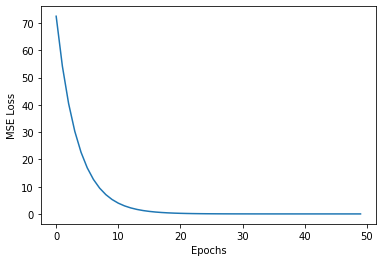

In [53]:
plt.plot(costs)
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.show()

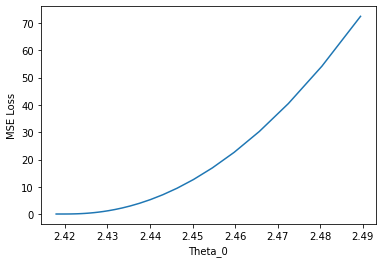

In [54]:
plt.plot(thetas_0 ,costs)
plt.xlabel("Theta_0")
plt.ylabel("MSE Loss")
plt.show()

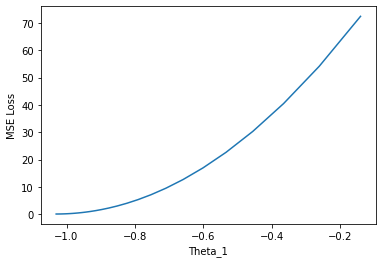

In [55]:
plt.plot(thetas_1,costs)
plt.xlabel("Theta_1")
plt.ylabel("MSE Loss")
plt.show()

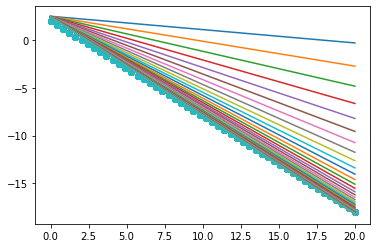

In [56]:
for i in range(iteration):
    y_predicated_draw = thetas_0[i] + thetas_1[i] * x_input
    plt.scatter(x_input, y_output)
    plt.plot(x_input, y_predicated_draw)

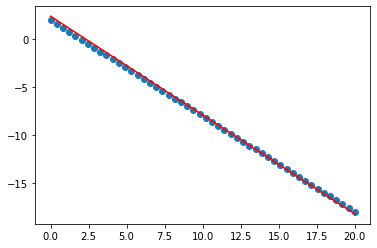

In [57]:
y_predicated_best = thetas_0[-1] + thetas_1[-1] * x_input
plt.scatter(x_input, y_output)
plt.plot(x_input, y_predicated_draw, 'r')

### Update your Batch GD for one variable  implementation to be NAG and check your results

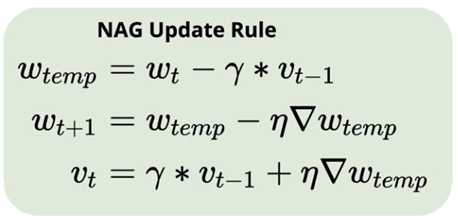

In [58]:
def NAG_gradient_descent(x_input_fun, y_output_fun, learing_rate, gamma_fun, max_iter):
    m = len(x_input_fun)
    theta_0, theta_1,theta_0_tmp, theta_1_tmp, cost = 2.5, 0, 0, 0, 0
    v_old_0, v_new_0, v_old_1, v_new_1 = 0, 0, 0, 0
    all_theta_0, all_theta_1, costs = [], [], []
    
    for i in range(max_iter):
        hypothesis = theta_0 + theta_1 * x_input_fun
        cost = (1/(2 * m)) * ((np.linalg.norm(hypothesis - y_output_fun)) ** 2)
        
        #NAG update
        
        #calculate thetas temp
        theta_0_tmp = theta_0 - gamma_fun*v_old_0
        theta_1_tmp = theta_1 - gamma_fun*v_old_1
        
        #calculate gradients of thetas temp
        hypothesis_tmp = theta_0_tmp + theta_1_tmp * x_input_fun
        gradients_tmp = [(1/m) * np.sum(hypothesis_tmp - y_output_fun), (1/m) * np.sum(x_input_fun.dot(hypothesis_tmp - y_output_fun))]

        #calculate update thetas
        theta_0 = theta_0_tmp - learing_rate*gradients_tmp[0]
        theta_1 = theta_1_tmp - learing_rate*gradients_tmp[1]
        
        #calculate accumlative gradients
        v_new_0 = gamma_fun*v_old_0 + learing_rate*gradients_tmp[0]
        v_new_1 = gamma_fun*v_old_1 + learing_rate*gradients_tmp[1]
        v_old_0 = v_new_1
        v_old_1 = v_new_1
   
        all_theta_0.append(theta_0)
        all_theta_1.append(theta_1)
        costs.append(cost)

    return all_theta_0, all_theta_1, costs

In [59]:
iteration = 50
alpha = 0.001
gamma = 0.5
thetas_0, thetas_1, costs = NAG_gradient_descent(x_input, y_output, alpha, gamma, iteration)

In [60]:
y_predicated = thetas_0[-1] + thetas_1[-1] * x_input
y_predicated

array([  1.96422092,   1.55714301,   1.1500651 ,   0.74298719,
         0.33590928,  -0.07116862,  -0.47824653,  -0.88532444,
        -1.29240235,  -1.69948026,  -2.10655817,  -2.51363608,
        -2.92071399,  -3.3277919 ,  -3.73486981,  -4.14194771,
        -4.54902562,  -4.95610353,  -5.36318144,  -5.77025935,
        -6.17733726,  -6.58441517,  -6.99149308,  -7.39857099,
        -7.80564889,  -8.2127268 ,  -8.61980471,  -9.02688262,
        -9.43396053,  -9.84103844, -10.24811635, -10.65519426,
       -11.06227217, -11.46935007, -11.87642798, -12.28350589,
       -12.6905838 , -13.09766171, -13.50473962, -13.91181753,
       -14.31889544, -14.72597335, -15.13305125, -15.54012916,
       -15.94720707, -16.35428498, -16.76136289, -17.1684408 ,
       -17.57551871, -17.98259662])

In [61]:
r2_score(y_output, y_predicated)

0.9999904958806152

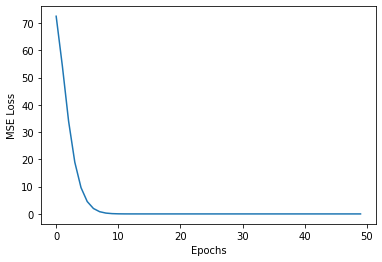

In [62]:
plt.plot(costs)
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.show()

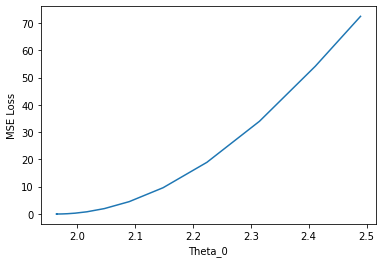

In [63]:
plt.plot(thetas_0 ,costs)
plt.xlabel("Theta_0")
plt.ylabel("MSE Loss")
plt.show()

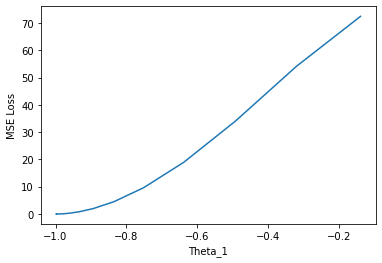

In [64]:
plt.plot(thetas_1,costs)
plt.xlabel("Theta_1")
plt.ylabel("MSE Loss")
plt.show()

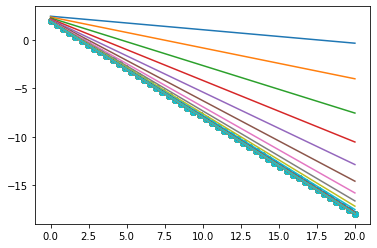

In [65]:
for i in range(iteration):
    y_predicated_draw = thetas_0[i] + thetas_1[i] * x_input
    plt.scatter(x_input, y_output)
    plt.plot(x_input, y_predicated_draw)

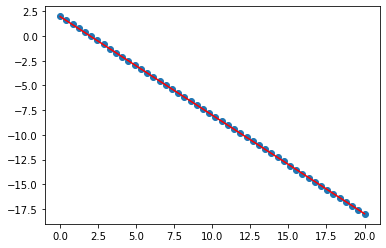

In [66]:
y_predicated_best = thetas_0[-1] + thetas_1[-1] * x_input
plt.scatter(x_input, y_output)
plt.plot(x_input, y_predicated_draw, 'r')

In [67]:
#Momentum = 0.95
#converge after approx. 25 iteration
#big difference between NAG and Momentum_GD at the same parameters look above -_-

In [68]:
iteration = 200
alpha = 0.001
gamma = 0.95
thetas_0, thetas_1, costs = NAG_gradient_descent(x_input, y_output, alpha, gamma, iteration)

In [69]:
y_predicated = thetas_0[-1] + thetas_1[-1] * x_input
y_predicated

array([ 1.59596114e+00,  1.20004558e+00,  8.04130007e-01,  4.08214438e-01,
        1.22988698e-02, -3.83616699e-01, -7.79532267e-01, -1.17544784e+00,
       -1.57136340e+00, -1.96727897e+00, -2.36319454e+00, -2.75911011e+00,
       -3.15502568e+00, -3.55094125e+00, -3.94685682e+00, -4.34277238e+00,
       -4.73868795e+00, -5.13460352e+00, -5.53051909e+00, -5.92643466e+00,
       -6.32235023e+00, -6.71826580e+00, -7.11418136e+00, -7.51009693e+00,
       -7.90601250e+00, -8.30192807e+00, -8.69784364e+00, -9.09375921e+00,
       -9.48967478e+00, -9.88559034e+00, -1.02815059e+01, -1.06774215e+01,
       -1.10733371e+01, -1.14692526e+01, -1.18651682e+01, -1.22610838e+01,
       -1.26569993e+01, -1.30529149e+01, -1.34488305e+01, -1.38447460e+01,
       -1.42406616e+01, -1.46365772e+01, -1.50324927e+01, -1.54284083e+01,
       -1.58243239e+01, -1.62202394e+01, -1.66161550e+01, -1.70120706e+01,
       -1.74079861e+01, -1.78039017e+01])

In [70]:
r2_score(y_output, y_predicated)

0.998788011358544

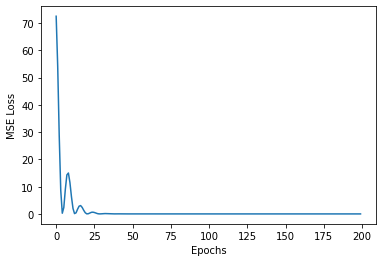

In [71]:
plt.plot(costs)
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.show()

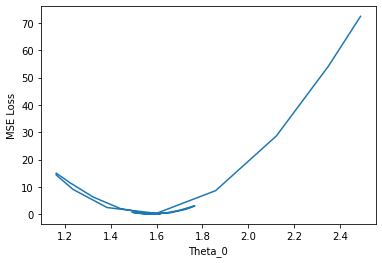

In [72]:
plt.plot(thetas_0 ,costs)
plt.xlabel("Theta_0")
plt.ylabel("MSE Loss")
plt.show()

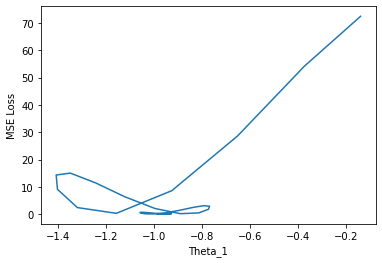

In [73]:
plt.plot(thetas_1,costs)
plt.xlabel("Theta_1")
plt.ylabel("MSE Loss")
plt.show()

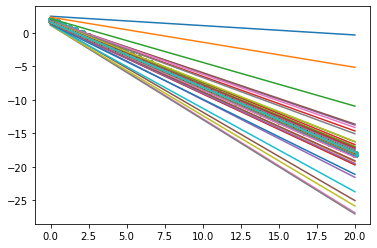

In [74]:
for i in range(iteration):
    y_predicated_draw = thetas_0[i] + thetas_1[i] * x_input
    plt.scatter(x_input, y_output)
    plt.plot(x_input, y_predicated_draw)

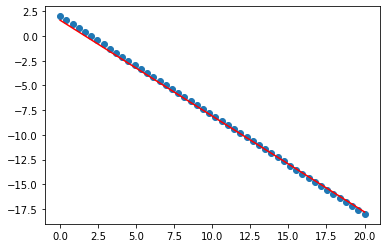

In [75]:
y_predicated_best = thetas_0[-1] + thetas_1[-1] * x_input
plt.scatter(x_input, y_output)
plt.plot(x_input, y_predicated_draw, 'r')

## Congratulations 
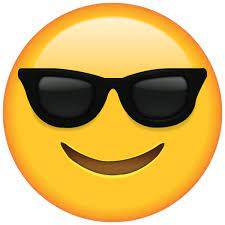